# Задача "Колледжи"
Какие отличия между исследовательскими университетами и школами искусств?
Используя данные из файла colleges, выдвините предположения о возможных различиях между двумя типами институтов.
Для это проведите описательный анализ исходных данных.  Выдвините несколько гипотез.
Например, "В университеты поступить сложнее (процент принятых меньше)"


Формат файла
*  School -  название школы
*   $/Student  -  Деньги, расходуемые на одного студента в среднем
*  Top 10% -  % студентов в топ 10% выпускных классов
*   %PhD -  %  факультетов, имеющих PhD
*   Grad%: % студентов, которые успешно завершили обучение
*  Acceptance: - % принятых абитуриентов
*  SAT - медиана объединенных значений Math и Verbal SAT  студентов
*  School_Type - тип школы (школа искусств  'LibArts', исследовательский университет 'Univ')

In [14]:
import pandas as pd
import numpy as np
from seaborn import boxplot
import matplotlib.pyplot as plt
from seaborn import distplot

In [3]:
df_school = pd.read_csv('Downloads/colleges.txt', sep = '\t')
df_school

,School,School_Type,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%
0,Amherst,Lib Arts,1315,22,26636,85,81,93
1,Swarthmore,Lib Arts,1310,24,27487,78,93,88
2,Williams,Lib Arts,1336,28,23772,86,90,93
3,Bowdoin,Lib Arts,1300,24,25703,78,95,90
4,Wellesley,Lib Arts,1250,49,27879,76,91,86
5,Pomona,Lib Arts,1320,33,26668,79,98,80
6,Wesleyan (CT),Lib Arts,1290,35,19948,73,87,91
7,Middlebury,Lib Arts,1255,25,24718,65,89,92
8,Smith,Lib Arts,1195,57,25271,65,90,87
9,Davidson,Lib Arts,1230,36,17721,77,94,89


Разделим наблюдения на две выборки: выборка по исследовательским университетам и выборка по институтам искусств.

In [4]:
df_univer = df_school[df_school['School_Type']=='Univ']
df_art = df_school[df_school['School_Type']=='Lib Arts']

In [5]:
df_univer

,School,School_Type,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%
25,Harvard,Univ,1370,18,46918,90,99,90
26,Stanford,Univ,1370,18,61921,92,96,88
27,Yale,Univ,1350,19,52468,90,97,93
28,Princeton,Univ,1340,17,48123,89,99,93
29,Cal Tech,Univ,1400,31,102262,98,98,75
30,MIT,Univ,1357,30,56766,95,98,86
31,Duke,Univ,1310,25,39504,91,95,91
32,Dartmouth,Univ,1306,25,35804,86,100,95
33,Cornell,Univ,1280,30,37137,85,90,83
34,Columbia,Univ,1268,29,45879,78,93,90


Постройте ящики с усами по каждой из характеристик (SAT ... Grad%) для каждого типа институтов. Какие из следующих утверждений верны (речь идет о наблюдаемых данных)?

Text(0.5, 1.0, 'Art_Grad')

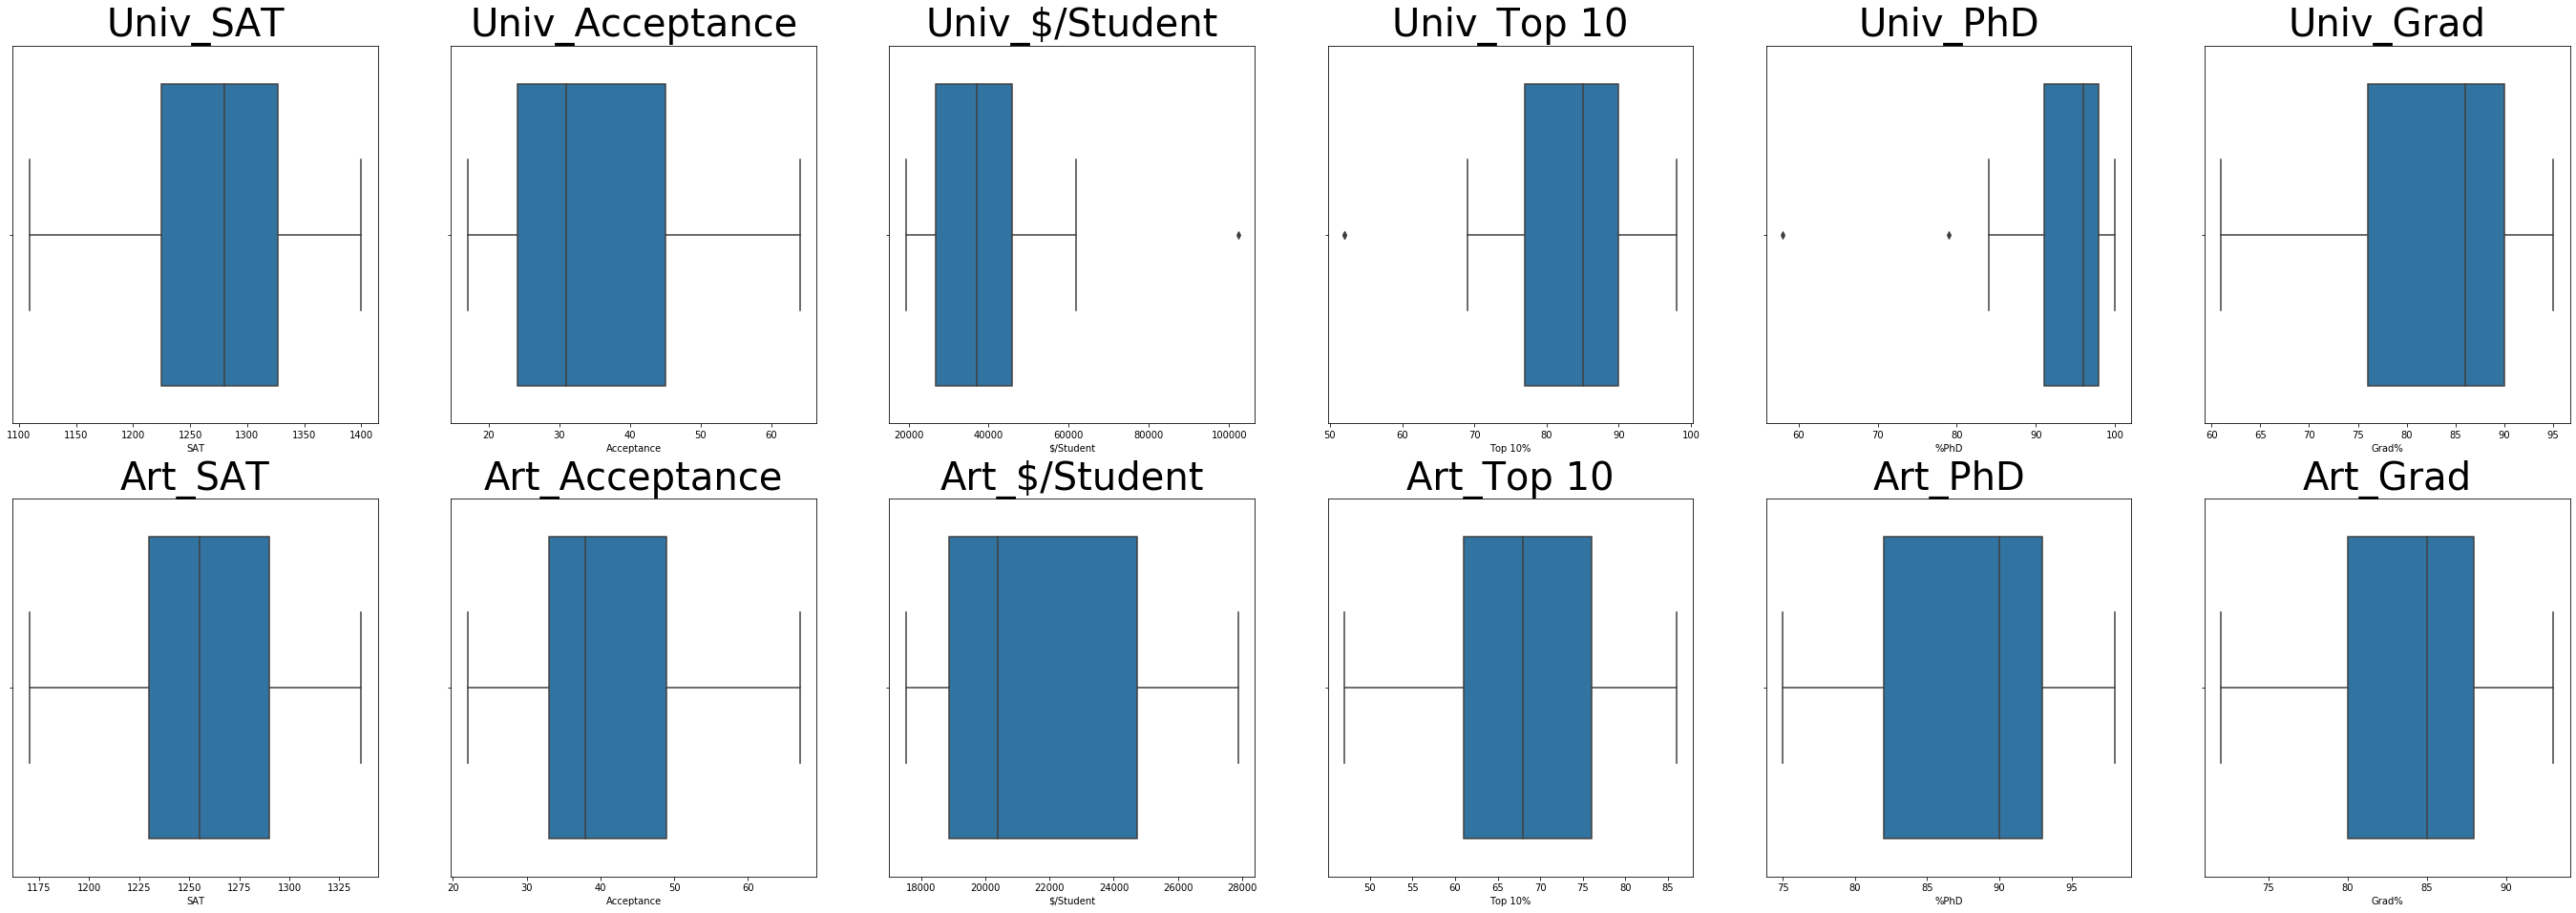

In [32]:
fig, axes = plt.subplots(2, 6, figsize=(48, 16))
boxplot(ax=axes[0][0], x=df_univer['SAT'])
axes[0][0].set_title("Univ_SAT", fontsize = 40)
boxplot(ax=axes[0][1], x=df_univer['Acceptance'])
axes[0][1].set_title("Univ_Acceptance", fontsize = 40)
boxplot(ax=axes[0][2], x=df_univer['$/Student'])
axes[0][2].set_title("Univ_$/Student", fontsize = 40)
boxplot(ax=axes[0][3], x=df_univer['Top 10%'])
axes[0][3].set_title("Univ_Top 10", fontsize = 40)
boxplot(ax=axes[0][4], x=df_univer['%PhD'])
axes[0][4].set_title("Univ_PhD", fontsize = 40)
boxplot(ax=axes[0][5], x=df_univer['Grad%'])
axes[0][5].set_title("Univ_Grad", fontsize = 40)
                     
boxplot(ax=axes[1][0], x=df_art['SAT'])
axes[1][0].set_title("Art_SAT", fontsize = 40)
boxplot(ax=axes[1][1], x=df_art['Acceptance'])
axes[1][1].set_title("Art_Acceptance", fontsize = 40)
boxplot(ax=axes[1][2], x=df_art['$/Student'])
axes[1][2].set_title("Art_$/Student", fontsize = 40)
boxplot(ax=axes[1][3], x=df_art['Top 10%'])
axes[1][3].set_title("Art_Top 10", fontsize = 40)
boxplot(ax=axes[1][4], x=df_art['%PhD'])
axes[1][4].set_title("Art_PhD", fontsize = 40)
boxplot(ax=axes[1][5], x=df_art['Grad%'])
axes[1][5].set_title("Art_Grad", fontsize = 40)

In [47]:
univer_accept_part = sum(df_univer['Acceptance'])/sum(df_school['Acceptance'])
art_accept_part = sum(df_art['Acceptance'])/sum(df_school['Acceptance'])
print('univer_accept_part={0}, art_accept_part={1}'.format(univer_accept_part, art_accept_part))

univer_accept_part=0.46405919661733613, art_accept_part=0.5359408033826638


In [8]:
df_school.columns

Index(['School', 'School_Type', 'SAT', 'Acceptance', '$/Student', 'Top 10%',
       '%PhD', 'Grad%'],
      dtype='object')

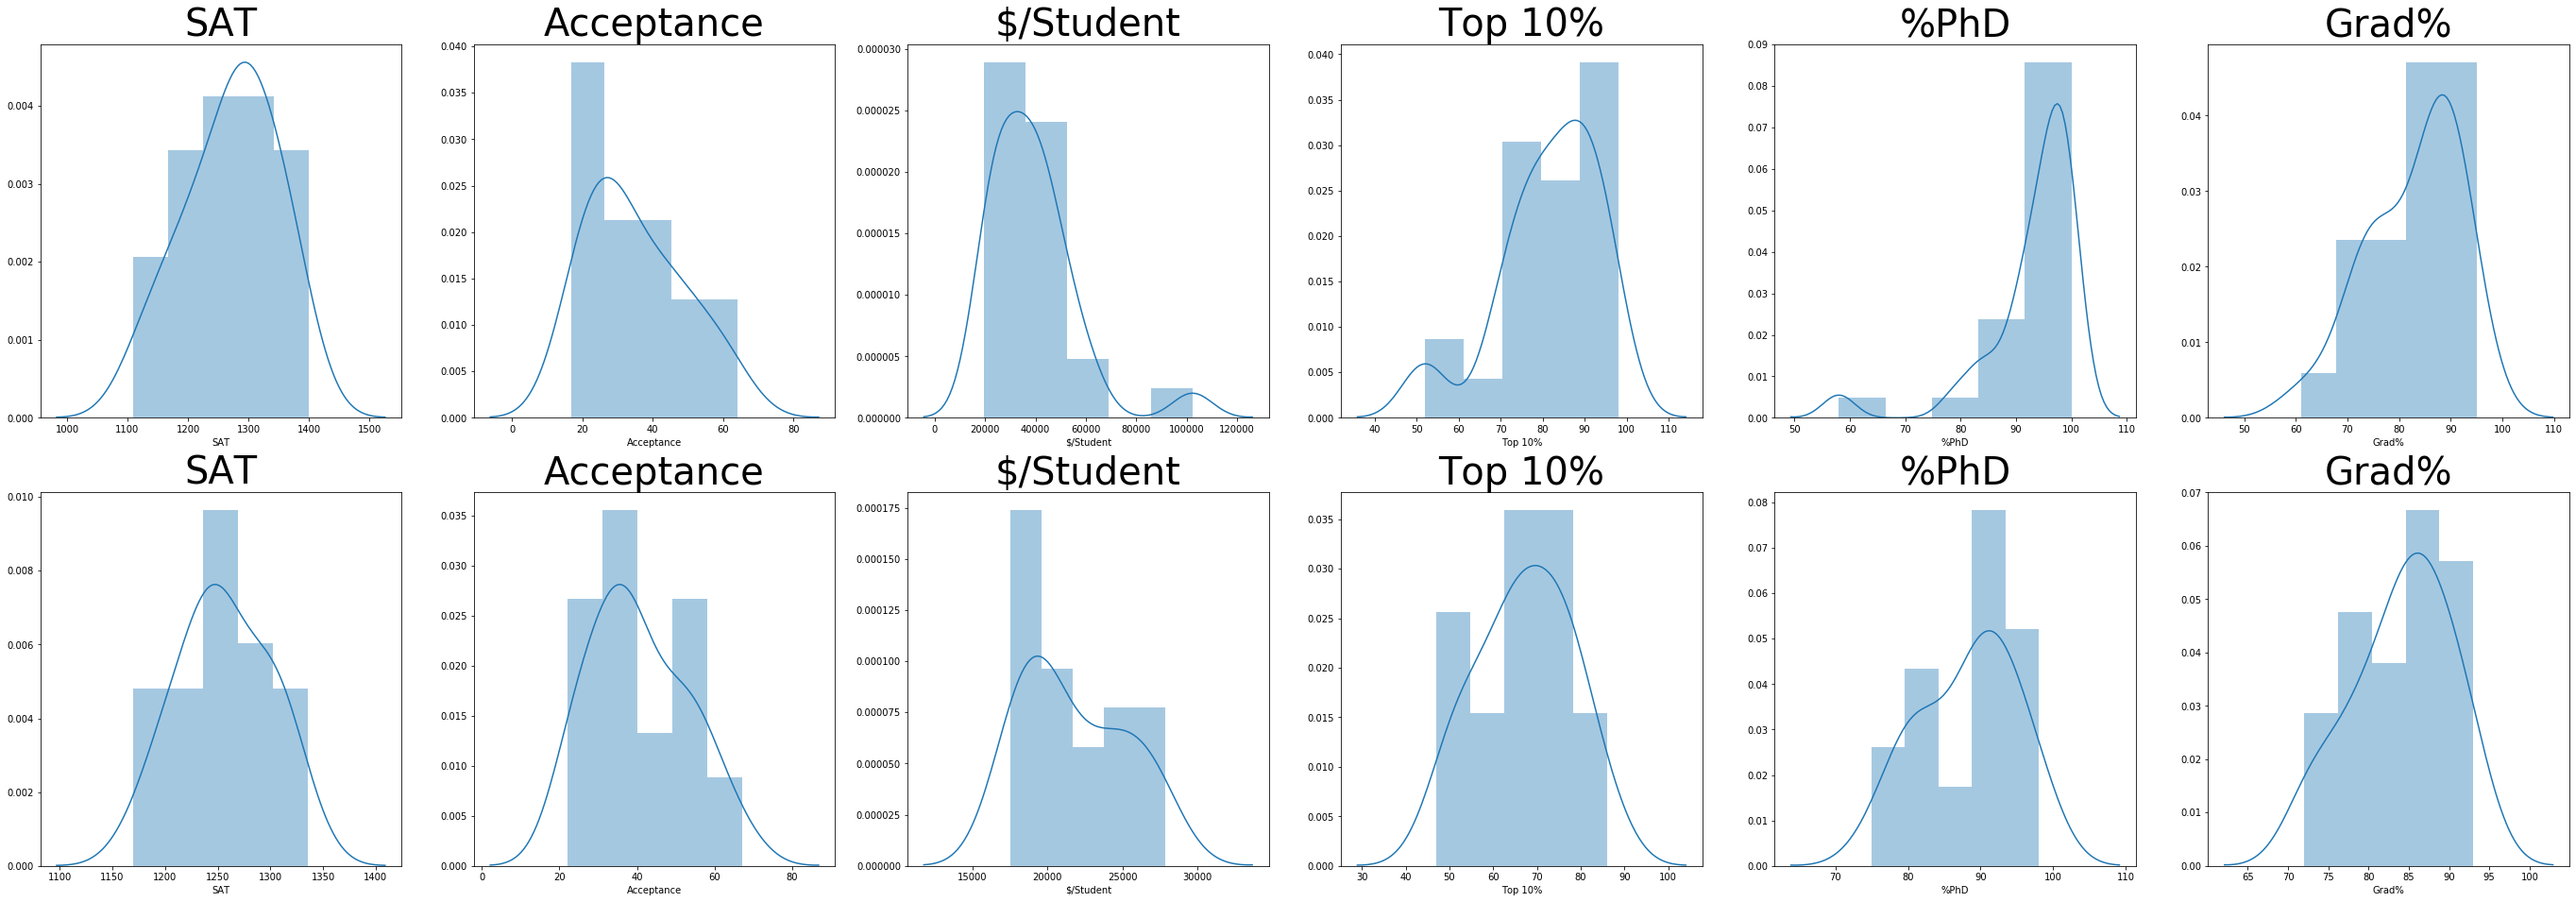

In [18]:
m = 2
n = 6
fig, axes = plt.subplots(m, n, figsize=(48, 16))
for j in range(n):
    column_name = df_school.columns[2+j]
    distplot(a=df_univer[column_name], ax=axes[0][j], bins=5)
    axes[0][j].set_title(column_name, fontsize = 40)
    distplot(a=df_art[column_name], ax=axes[1][j], bins=5)
    axes[1][j].set_title(column_name, fontsize = 40)

In [19]:
univer_phd_part = sum(df_univer['%PhD'])/sum(df_school['%PhD'])
art_phd_part = sum(df_art['%PhD'])/sum(df_school['%PhD'])
print('univer_phd_part={0}, art_phd_part={1}'.format(univer_phd_part, art_phd_part))

univer_phd_part=0.5128091872791519, art_phd_part=0.4871908127208481


In [25]:
mean_art_SAT = np.mean(df_art['SAT'])
third_quantile_univer_accept = np.quantile(df_univer['Acceptance'], 0.75)
college_name_max_spent_per_student = df_univer[df_univer['$/Student'] == max(df_univer['$/Student'])]
print('mean_art_SAT=', mean_art_SAT, '\nthird_quantile_art_accept=', third_quantile_univer_accept, '\n', college_name_max_spent_per_student)                  

mean_art_SAT= 1256.64 
third_quantile_art_accept= 45.0 
       School School_Type   SAT  Acceptance  $/Student  Top 10%  %PhD  Grad%
29  Cal Tech        Univ  1400          31     102262       98    98     75
